In [2]:
from sklearn.datasets import fetch_lfw_people


face_data = fetch_lfw_people(min_faces_per_person=80)

X = face_data.data
Y = face_data.target

In [3]:
X.shape

(1140, 2914)

In [4]:
X[:5]

array([[0.31895426, 0.34901962, 0.25882354, ..., 0.4       , 0.5529412 ,
        0.82483655],
       [0.20915033, 0.1882353 , 0.26928106, ..., 0.9267974 , 0.89673203,
        0.86928105],
       [0.14509805, 0.151634  , 0.15947713, ..., 0.3882353 , 0.2784314 ,
        0.23006536],
       [0.13594772, 0.12156863, 0.1124183 , ..., 0.551634  , 0.5006536 ,
        0.5215686 ],
       [0.6745098 , 0.5882353 , 0.4928105 , ..., 0.40522876, 0.41960785,
        0.43006536]], dtype=float32)

In [2]:
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names)

Input data size : (1140, 2914)
Output data size : (1140,)
Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [4]:
Y[:5]

array([2, 3, 1, 4, 1], dtype=int64)

In [5]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


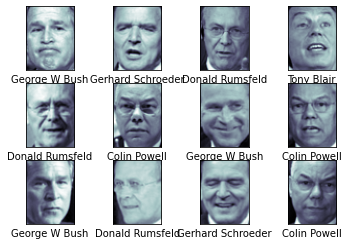

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_data.target_names[face_data.target[i]])

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.svm import SVC
clf = SVC(class_weight='balanced', random_state=42)

In [14]:
clf.fit(X_train, Y_train)
print(f"Train accuracy: {clf.score(X_train, Y_train)}")
print(f"Test accuracy: {clf.score(X_test, Y_test)}")

Train accuracy: 0.9578947368421052
Test accuracy: 0.8596491228070176


In [15]:
clf = SVC(class_weight='balanced', random_state=42)


from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10],
              'gamma': [1e-07, 1e-08, 1e-06],
              'kernel' : ['rbf', 'linear'] }

grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']})

In [16]:
print('The best model:\n', grid_search.best_params_)

The best model:
 {'C': 1, 'gamma': 1e-07, 'kernel': 'linear'}


In [17]:
print('The best averaged performance:', grid_search.best_score_)


The best averaged performance: 0.8315789473684211


In [18]:
clf_best = grid_search.best_estimator_

print(f'The accuracy is: {clf_best.score(X_test, Y_test)*100:.1f}%')


The accuracy is: 87.7%


In [19]:
pred = clf_best.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, pred, target_names=face_data.target_names))


                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.89      0.78      0.83        32
    George W Bush       0.87      0.91      0.89       127
Gerhard Schroeder       0.89      0.86      0.88        29
       Tony Blair       0.88      0.85      0.86        33

         accuracy                           0.88       285
        macro avg       0.88      0.86      0.87       285
     weighted avg       0.88      0.88      0.88       285



In [20]:
#Let us use dimesnionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(class_weight='balanced', kernel='rbf', random_state=42)

from sklearn.pipeline import Pipeline
model = Pipeline([('pca', pca),
                  ('svc', svc)])

In [21]:
parameters_pipeline = {'svc__C': [1, 3, 10],
                       'svc__gamma': [0.001, 0.005]}
grid_search = GridSearchCV(model, parameters_pipeline)

grid_search.fit(X_train, Y_train)

print('The best model:\n', grid_search.best_params_)
print('The best averaged performance:', grid_search.best_score_)

The best model:
 {'svc__C': 3, 'svc__gamma': 0.005}
The best averaged performance: 0.854970760233918


In [22]:
model_best = grid_search.best_estimator_
print(f'The accuracy is: {model_best.score(X_test, Y_test)*100:.1f}%')
pred = model_best.predict(X_test)
print(classification_report(Y_test, pred, target_names=face_data.target_names))

The accuracy is: 89.8%
                   precision    recall  f1-score   support

     Colin Powell       0.91      0.91      0.91        64
  Donald Rumsfeld       0.79      0.84      0.82        32
    George W Bush       0.93      0.94      0.93       127
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.88      0.85      0.86        33

         accuracy                           0.90       285
        macro avg       0.88      0.87      0.88       285
     weighted avg       0.90      0.90      0.90       285

